# Support Vector Regressor 

SVM can be modified to work on regression problem. We call this model Support Vector Regressor (SVR). The complete explanation for this notebook is available at https://youranalystbuddy.com/support-vector-regression/

## Toy Example

We will begin with a toy example of a dataset with a single feature and a target. This allows us to draw the prediction made by SVR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('test_grade.csv')
data.head(2)

,studytime,grade
0,1.21,37
1,0.69,24


In [2]:
X = data[['studytime']].values
y = data['grade'].values

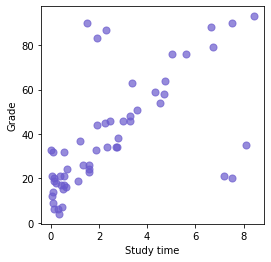

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

### Linear SVR

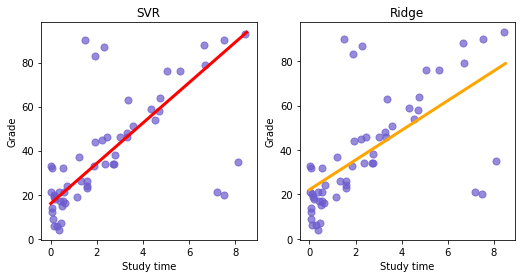

In [4]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X,y)

X_points = np.linspace(0,8.5,100)

plt.figure(figsize=(8.5,4))
plt.subplot(121)
y_points = svr.predict(X_points.reshape(-1,1))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.plot(X_points,y_points, color='red', linewidth=3)
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('SVR')


### Compare with Ridge regression
from sklearn.linear_model import Ridge

rl = Ridge()
rl.fit(X,y)
plt.subplot(122)
y_points = rl.predict(X_points.reshape(-1,1))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.plot(X_points,y_points, color='orange', linewidth=3)
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Ridge')

plt.show()

### Epsilon demonstration

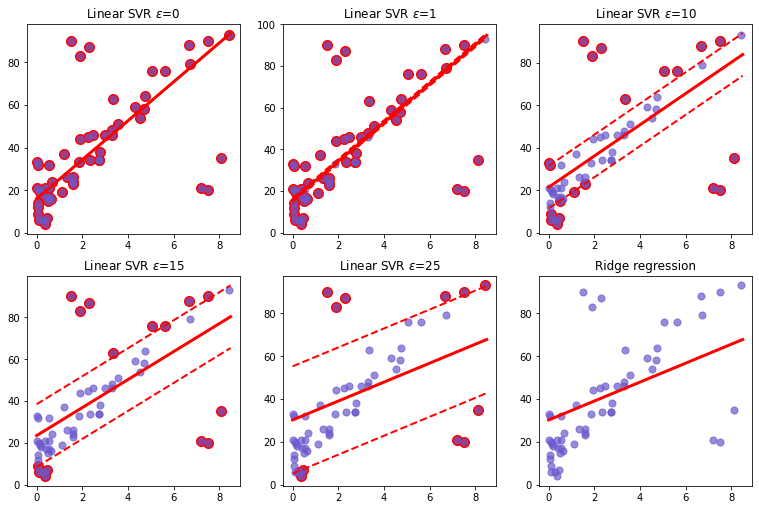

In [5]:
i = 1
X_points = np.linspace(0,8.5,100)

plt.figure(figsize=(13,8.5))

for eps in [0, 1, 10, 15, 25]:
    svr = SVR(kernel='linear', epsilon=eps)
    svr.fit(X,y)
    y_points = svr.predict(X_points.reshape(-1,1))
    plt.subplot(2,3,i)
    plt.scatter(X[svr.support_,0],y[svr.support_],s=100,c='red')
    plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
    plt.plot(X_points,y_points, color='red', linewidth=3)
    plt.plot(X_points,y_points+eps, linestyle='--', color='red', linewidth=2)
    plt.plot(X_points,y_points-eps, linestyle='--', color='red', linewidth=2)
    plt.title('Linear SVR $\epsilon$='+str(eps))
    i+=1
    
from sklearn.linear_model import Ridge

lr = Ridge()
lr.fit(X,y)
y_points = svr.predict(X_points.reshape(-1,1))
plt.subplot(2,3,i)
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.plot(X_points,y_points, color='red', linewidth=3)
plt.title('Ridge regression')

plt.show()

## Kernel SVR for nonlinear data

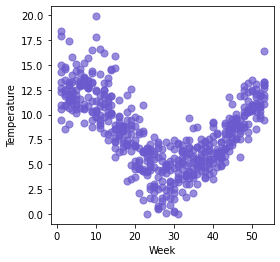

In [6]:
data = pd.read_csv('weekly-min-temp.csv')
X = data[['Week']].values
y = data['Temp'].values

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.xlabel('Week')
plt.ylabel('Temperature')
plt.show()

### Base SVR

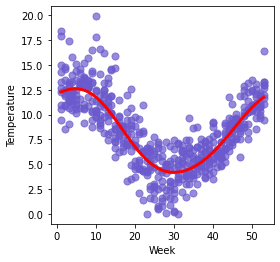

In [7]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X,y)
X_points = np.arange(53) + 1
y_points = svr.predict(X_points.reshape(-1,1))

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.plot(X_points,y_points, color='red', linewidth=3)
plt.xlabel('Week')
plt.ylabel('Temperature')
plt.show()

As you can see, SVR can automatically learn the curve pattern in data without you having to manually engineer more features. Compare to a linear model:

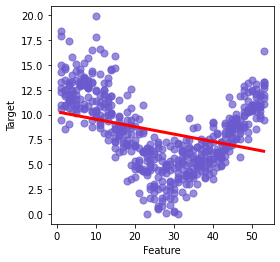

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X.reshape(-1,1),y)
y_points = ridge.predict(X_points.reshape(-1,1))

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
plt.plot(X_points,y_points, color='red', linewidth=3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

#### Function to draw SVR on 2D data (1 feature 1 label)

In [9]:
def draw_svr(X, y, svr, title):
    svr.fit(X,y)
    X_points = np.arange(53) + 1
    y_points = svr.predict(X_points.reshape(-1,1))
    plt.scatter(X[svr.support_,0],y[svr.support_],s=100,c='red')
    plt.scatter(X[:,0],y,s=50,c='slateblue',alpha=0.7)
    plt.plot(X_points,y_points, color='red', linewidth=3)
    plt.plot(X_points,y_points+eps, linestyle='--', color='red', linewidth=2)
    plt.plot(X_points,y_points-eps, linestyle='--', color='red', linewidth=2)
    plt.title(title)

### Kernel SVR and epsilon

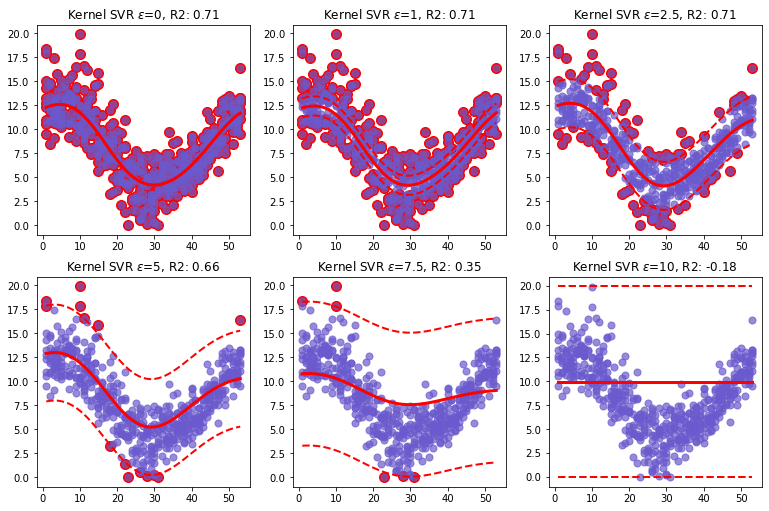

In [10]:
from sklearn.model_selection import cross_val_score
i = 1

plt.figure(figsize=(13,8.5))
for eps in [0, 1, 2.5, 5, 7.5, 10]:
    svr = SVR(epsilon=eps)
    cvaccuracy = round(cross_val_score(svr,X,y).mean(),5)
    title = 'Kernel SVR $\epsilon$='+str(eps)+', R2: '+str(round(cvaccuracy,2))
    plt.subplot(2,3,i)
    draw_svr(X,y,svr,title)
    i+=1
plt.show()

### Polynomial kernel

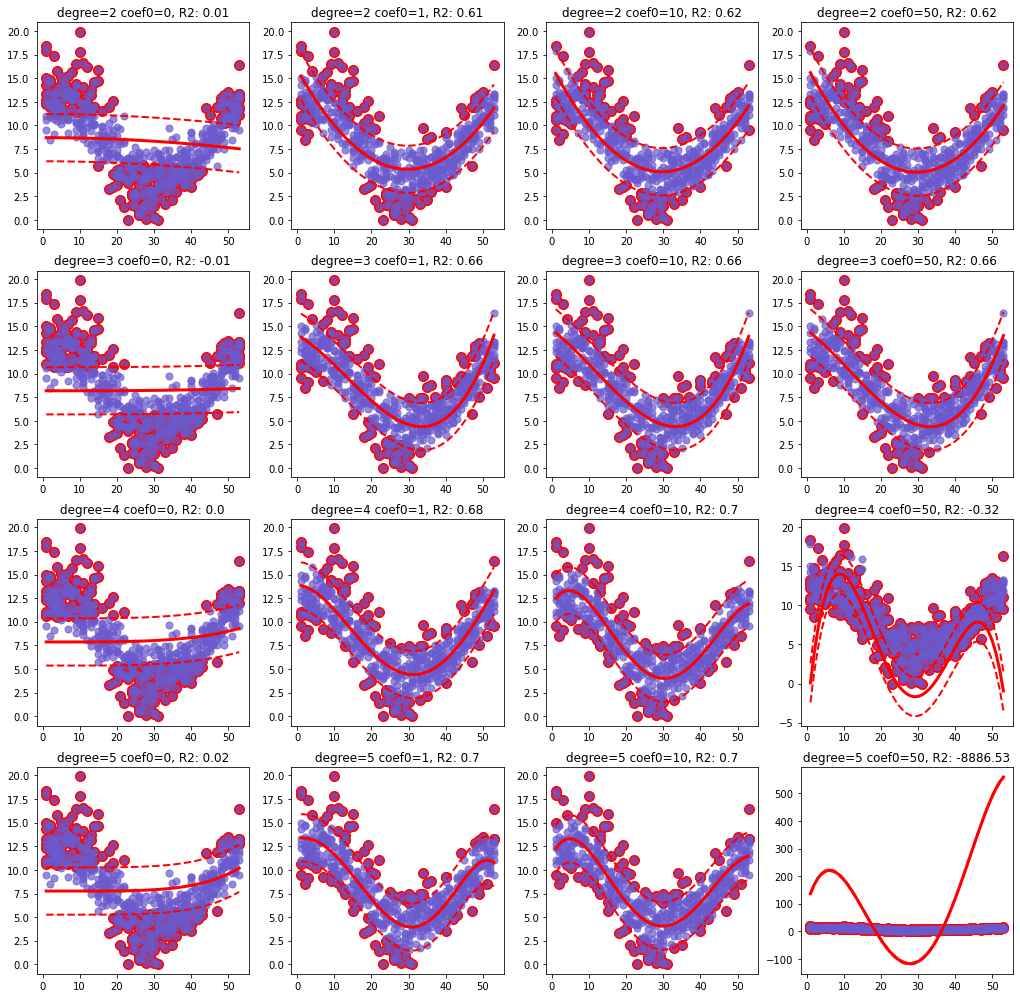

In [11]:
i = 1
X_points = np.arange(53) + 1
plt.figure(figsize=(17.5,17.5))
eps = 2.5
for degree in [2, 3, 4, 5]:
    for coef0 in [0, 1, 10, 50]:
        svr = SVR(epsilon=eps, kernel='poly', degree=degree, coef0=coef0)
        cvaccuracy = round(cross_val_score(svr,X,y).mean(),5)
        title = 'degree='+str(degree)+' coef0='+str(coef0)+', R2: '+str(round(cvaccuracy,2))
        plt.subplot(4,4,i)
        draw_svr(X,y,svr,title)
        i += 1
plt.show()

### RBF kernel

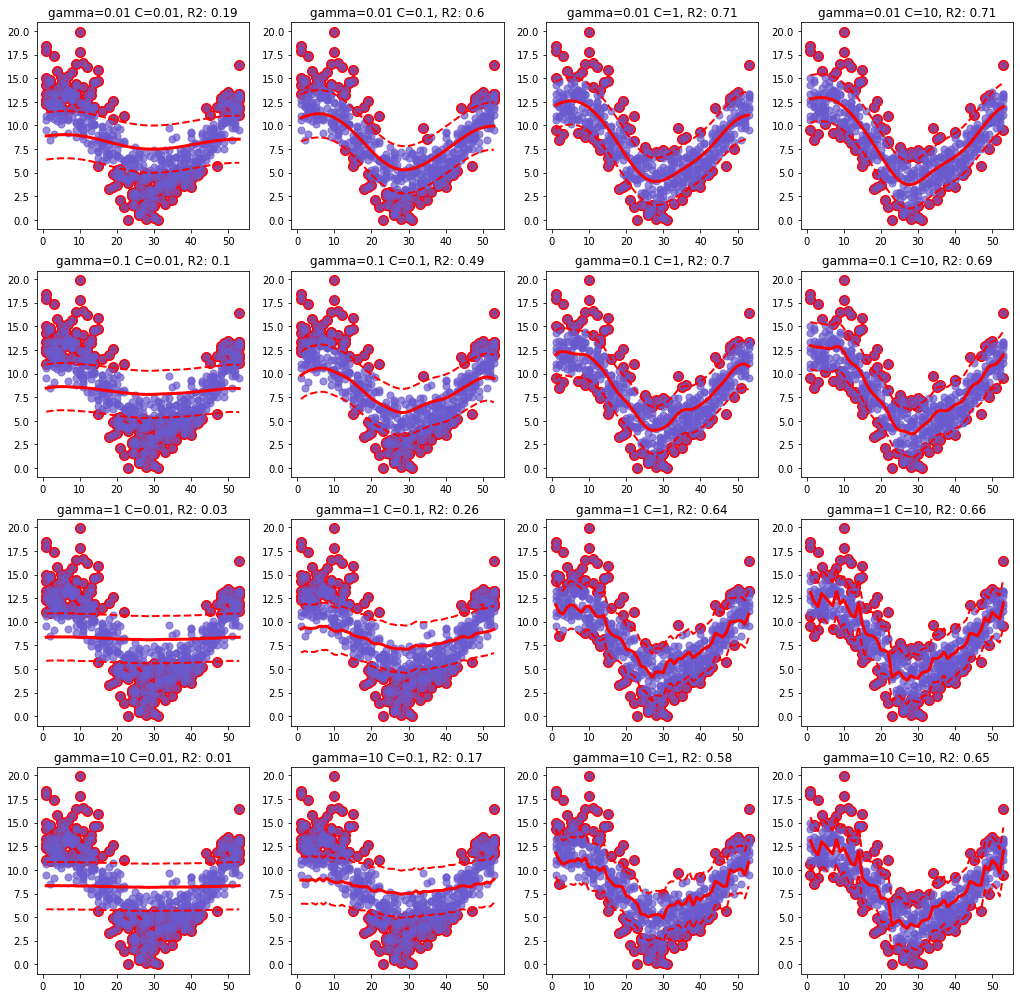

In [12]:
i = 1
X_points = np.arange(53) + 1
plt.figure(figsize=(17.5,17.5))
eps = 2.5
for gamma in [0.01, 0.1, 1, 10]:
    for C in [0.01, 0.1, 1, 10]:
        svr = SVR(epsilon=eps, gamma=gamma, C=C)
        plt.subplot(4,4,i)
        cvaccuracy = round(cross_val_score(svr,X,y).mean(),5)
        title = 'gamma='+str(gamma)+' C='+str(C)+', R2: '+str(round(cvaccuracy,2))
        draw_svr(X,y,svr,title)
        i += 1
plt.show()

## Finetune SVR

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear'], 'C' : [0.01, 0.1, 1, 10]},
    {'kernel':['poly'], 'degree' : [3, 4], 'coef0' : [1, 10], 'C' : [0.01, 0.1, 1, 10]},
    {'kernel':['rbf'], 'gamma' : [0.001, 0.01, 0.1, 1, 10], 'C' : [0.01, 0.1, 1, 10]}
]

gridsearch = GridSearchCV(SVR(epsilon=2.5),param_grid,scoring='r2')
gridsearch.fit(X,y)

GridSearchCV(estimator=SVR(epsilon=2.5),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'coef0': [1, 10],
                          'degree': [3, 4], 'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='r2')

In [14]:
gridsearch.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

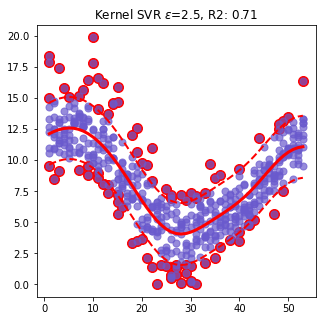

In [15]:
svr = gridsearch.best_estimator_

plt.figure(figsize=(5,5))
cvaccuracy = round(cross_val_score(svr,X,y).mean(),5)
title = 'Kernel SVR $\epsilon$='+str(eps)+', R2: '+str(round(cvaccuracy,2))
draw_svr(X,y,svr,title)
plt.show()